<div style="
  background: linear-gradient(135deg, #f8fafc, #e0f2fe);
  border-radius: 18px;
  padding: 25px;
  box-shadow: 0 4px 15px rgba(0, 0, 0, 0.1);
  font-family: 'Segoe UI', sans-serif;
  color: #1e293b;
  line-height: 1.6;
">

<h1 style="color: #0ea5e9; text-align: center;">📈 Cryptocurrency Price Forecasting Using LSTM Neural Networks</h1>

<p style="font-size: 17px;">
This project builds a <strong style="color:#2563eb;">deep learning model</strong> to forecast 
future cryptocurrency prices using <strong style="color:#9333ea;">Long Short-Term Memory (LSTM)</strong> networks — 
a special type of RNN designed to learn long-term patterns in sequential financial data.
</p>

<h2 style="color: #14b8a6;">✨ Project Overview</h2>

<p>
The workflow begins by cleaning and scaling the data, including features like 
<em>Open</em>, <em>High</em>, <em>Low</em>, <em>Close</em>, and <em>Volume</em>. 
After preparing the sequences, the LSTM model learns to capture market trends 
and predict price movements over time.
</p>

<p>
Once trained, the model forecasts prices up to <strong style="color:#f97316;">the end of 2025</strong>, 
providing both visual and tabular results — including 
<strong>color-coded trend indicators</strong> (↑ for uptrend, ↓ for downtrend, → for stable).
</p>

<h2 style="color: #14b8a6;">🧠 Key Components</h2>

<ul style="list-style-type: square;">
  <li>Data Cleaning, Feature Engineering & Normalization</li>
  <li>Sequence Preparation for LSTM Input</li>
  <li>Model Training and Evaluation</li>
  <li>Multi-step Forecasting until 2025</li>
  <li>Dynamic Visualization of Price Trends</li>
  <li>Interactive Table Highlighting Daily and % Changes</li>
</ul>

<h2 style="color: #14b8a6;">💻 Technologies Used</h2>

<ul style="list-style-type: circle;">
  <li><strong>Python</strong></li>
  <li>Pandas, NumPy, Matplotlib</li>
  <li>TensorFlow / Keras (LSTM Modeling)</li>
  <li>Scikit-learn (Scaling & Metrics)</li>
  <li>IPython & HTML Styling (Interactive Results)</li>
</ul>

<p style="text-align:center; color:#0f172a; margin-top:25px; font-weight:600;">
🚀 <em>Predict the future, visualize the possibilities, and understand the trends!</em>
</p>

</div>

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
🌿 Import Essential Libraries
</h1>

</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import yfinance as yf

2025-11-04 09:57:04.669035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762250224.871137      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762250224.931715      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
Download Cryptocurrency Data
</h1>

</div>

In [2]:
crypto_symbol = "BTC-USD"
start_date = "2020-01-01"
end_date = "2024-01-01"

df = yf.download(crypto_symbol, start=start_date, end=end_date)

print("Dataset Shape:", df.shape)
df.head()

/tmp/ipykernel_19/3959210774.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(crypto_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Dataset Shape: (1461, 5)


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f2fe, #dbeafe);
  border-radius: 16px;
  padding: 20px;
  text-align: center;
  box-shadow: 0 4px 10px rgba(0,0,0,0.08);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #1e40af;
  font-size: 30px;
  text-shadow: 1px 1px 4px rgba(0,0,0,0.1);
  letter-spacing: 0.6px;
">
📊 Data Analysis & Insights
</h1>

<p style="
  color: #374151;
  font-size: 16px;
  margin-top: 10px;
">
Exploring the dataset to uncover meaningful patterns, relationships, and insights using visual and statistical analysis.
</p>

</div>

<div style="
  background: linear-gradient(135deg, #dbeafe, #ede9fe);
  border-radius: 14px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 3px 10px rgba(0,0,0,0.08);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #1e3a8a;
  font-size: 28px;
  text-shadow: 1px 1px 3px rgba(0,0,0,0.1);
  letter-spacing: 0.5px;
">
🎨 Visualization Style Configuration & Color Palettes
</h1>

<p style="
  color: #4b5563;
  font-size: 16px;
  margin-top: 8px;
">
Custom luxury color themes and plot settings for creating elegant, modern, and visually appealing cryptocurrency visualizations.
</p>

</div>

In [3]:

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

luxury_palettes = {
    'crypto_modern': ['#FF6B9D', '#6BFFB8', '#6B8CFF', '#FFD166', '#EF476F', '#118AB2', '#073B4C'],
    'gradient_purple': ['#667EEA', '#764BA2', '#F093FB', '#F5576C', '#4FACFE', '#00F2FE', '#43E97B'],
    'neon_dark': ['#FF0080', '#00FF88', '#0080FF', '#FF8000', '#80FF00', '#8000FF', '#FF0080'],
    'pastel_dream': ['#FF9AA2', '#FFB7B2', '#FFDAC1', '#E2F0CB', '#B5EAD7', '#C7CEEA', '#F8B195'],
    'golden_hour': ['#FFD700', '#FFA500', '#FF8C00', '#FF6347', '#FF4500', '#FF1493', '#FF69B4'],
    'ocean_blue': ['#1E90FF', '#00BFFF', '#87CEEB', '#4682B4', '#5F9EA0', '#20B2AA', '#00CED1'],
    'forest_green': ['#228B22', '#32CD32', '#90EE90', '#006400', '#8FBC8F', '#3CB371', '#2E8B57']
}

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette(luxury_palettes['crypto_modern'])

plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 13
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['grid.alpha'] = 0.2

def add_gradient_background(ax):
    ax.set_facecolor('#0D1117')
    return ax

In [4]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']
custom_palette = sns.color_palette(colors)

plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'bold'
sns.set_palette(custom_palette)

In [5]:
import yfinance as yf

crypto_symbol = "BTC-USD"
start_date = "2022-01-01"
end_date = "2024-01-01"

ticker = yf.Ticker(crypto_symbol)
df = ticker.history(start=start_date, end=end_date)

print("Data downloaded successfully!")
print(f"Dataset shape: {df.shape}")
df.head()

Data downloaded successfully!
Dataset shape: (730, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-01 00:00:00+00:00,46311.746094,47827.312500,46288.484375,47686.812500,24582667004,0.0,0.0
2022-01-02 00:00:00+00:00,47680.925781,47881.406250,46856.937500,47345.218750,27951569547,0.0,0.0
2022-01-03 00:00:00+00:00,47343.542969,47510.726562,45835.964844,46458.117188,33071628362,0.0,0.0
2022-01-04 00:00:00+00:00,46458.851562,47406.546875,45752.464844,45897.574219,42494677905,0.0,0.0
2022-01-05 00:00:00+00:00,45899.359375,46929.046875,42798.222656,43569.003906,36851084859,0.0,0.0


In [6]:
import yfinance as yf

crypto_symbol = "BTC-USD"
start_date = "2023-01-01"
end_date = "2024-01-01"


ticker = yf.Ticker(crypto_symbol)
df = ticker.history(start=start_date, end=end_date)

df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_12'] = df['Close'].ewm(span=12).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(window=14).mean()))
df['MACD'] = df['EMA_12'] - df['Close'].ewm(span=26).mean()
df['Volatility'] = df['Close'].pct_change().rolling(30).std() * 100

print(" Premium Data Analysis Ready!")
print(f"Dataset shape: {df.shape}")

 Premium Data Analysis Ready!
Dataset shape: (365, 13)


<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
 Create subplots for price and volume

</h1>

</div>

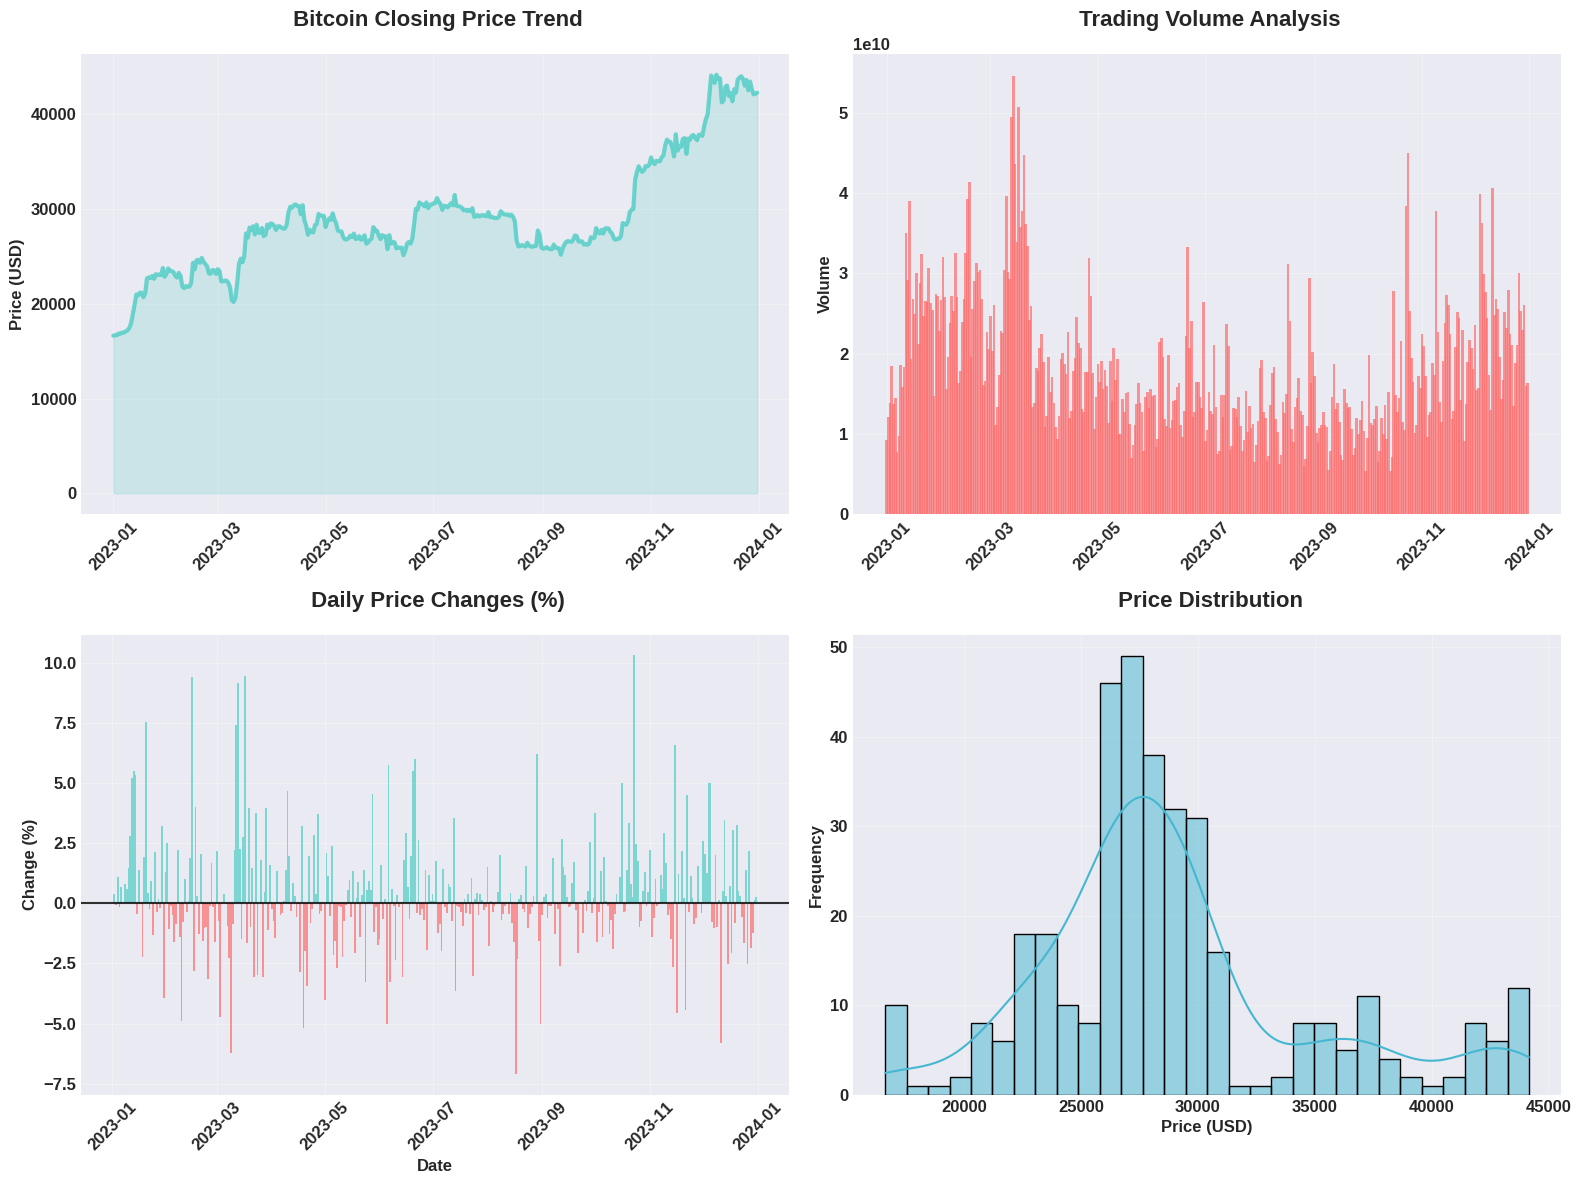

In [7]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.plot(df.index, df['Close'], color=colors[1], linewidth=3, alpha=0.8)
plt.fill_between(df.index, df['Close'], alpha=0.2, color=colors[1])
plt.title(' Bitcoin Closing Price Trend', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Price (USD)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
plt.bar(df.index, df['Volume'], color=colors[0], alpha=0.7, width=1.5)
plt.title(' Trading Volume Analysis', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Volume', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
daily_changes = df['Close'].pct_change() * 100
colors_change = [colors[1] if x >= 0 else colors[0] for x in daily_changes]
plt.bar(daily_changes.index, daily_changes, color=colors_change, alpha=0.7, width=1.0)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.8)
plt.title(' Daily Price Changes (%)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Change (%)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
sns.histplot(df['Close'], kde=True, color=colors[2], bins=30)
plt.title(' Price Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Price (USD)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
 Calculate technical indicators

</h1>

</div>

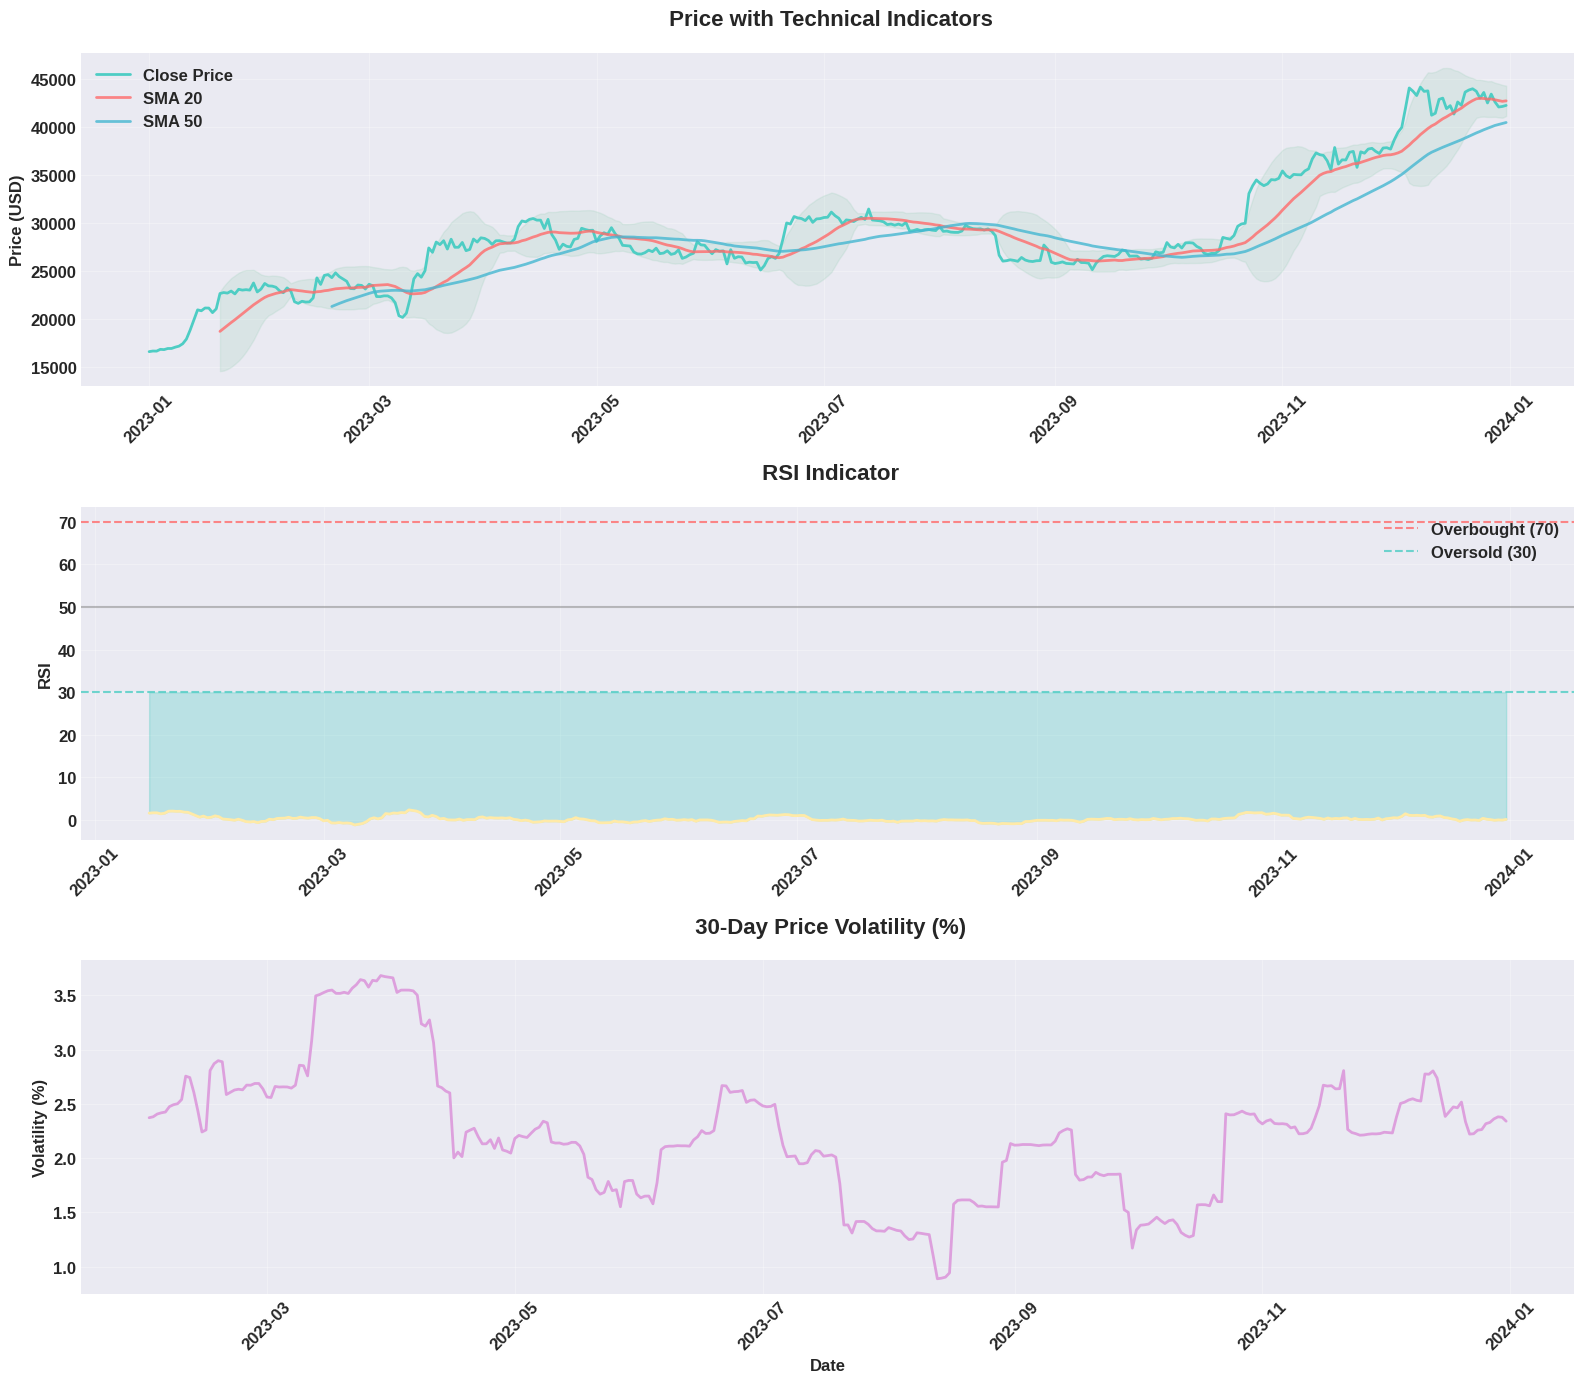

In [8]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_12'] = df['Close'].ewm(span=12).mean()
df['RSI'] = 100 - (100 / (1 + df['Close'].pct_change().rolling(window=14).mean()))

df['BB_upper'] = df['SMA_20'] + (df['Close'].rolling(20).std() * 2)
df['BB_lower'] = df['SMA_20'] - (df['Close'].rolling(20).std() * 2)

plt.figure(figsize=(16, 14))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['Close'], label='Close Price', color=colors[1], linewidth=2)
plt.plot(df.index, df['SMA_20'], label='SMA 20', color=colors[0], linewidth=2, alpha=0.8)
plt.plot(df.index, df['SMA_50'], label='SMA 50', color=colors[2], linewidth=2, alpha=0.8)
plt.fill_between(df.index, df['BB_upper'], df['BB_lower'], alpha=0.2, color=colors[3])
plt.title(' Price with Technical Indicators', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Price (USD)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
plt.plot(df.index, df['RSI'], color=colors[4], linewidth=2)
plt.axhline(y=70, color=colors[0], linestyle='--', alpha=0.8, label='Overbought (70)')
plt.axhline(y=30, color=colors[1], linestyle='--', alpha=0.8, label='Oversold (30)')
plt.axhline(y=50, color='gray', linestyle='-', alpha=0.5)
plt.fill_between(df.index, df['RSI'], 70, where=(df['RSI'] >= 70), alpha=0.3, color=colors[0])
plt.fill_between(df.index, df['RSI'], 30, where=(df['RSI'] <= 30), alpha=0.3, color=colors[1])
plt.title(' RSI Indicator', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('RSI', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
volatility = df['Close'].pct_change().rolling(30).std() * 100
plt.plot(volatility.index, volatility.values, color=colors[5], linewidth=2)
plt.title(' 30-Day Price Volatility (%)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Volatility (%)', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
 Calculate correlations
</h1>

</div>

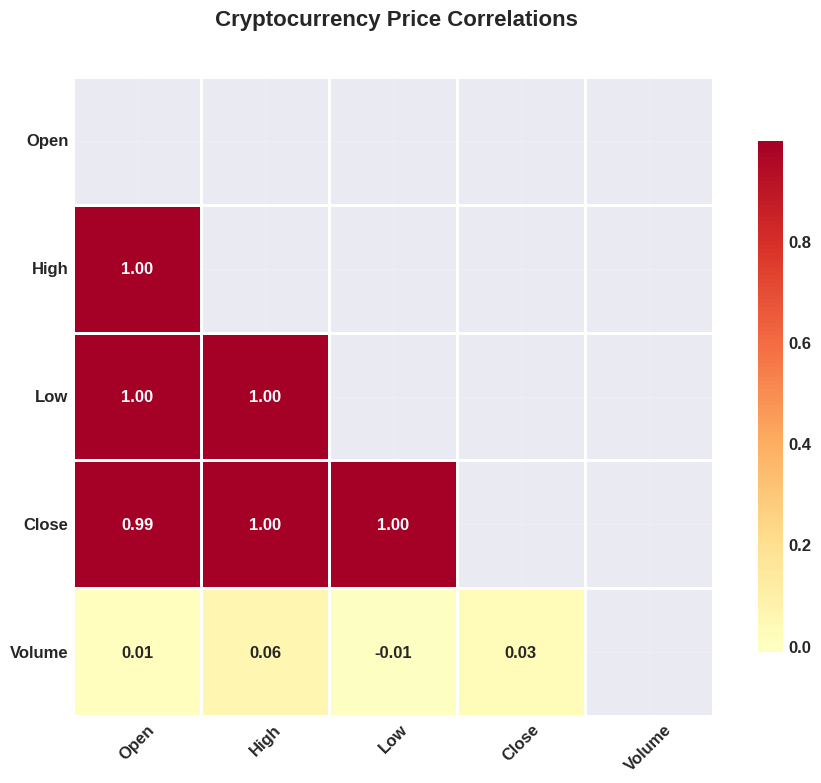

In [9]:
corr_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8},
            linewidths=1,
            annot_kws={'size': 12, 'weight': 'bold'})

plt.title(' Cryptocurrency Price Correlations\n', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=0, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(120deg, #f0fdf4, #dcfce7, #bbf7d0);
  border-radius: 14px;
  padding: 20px;
  text-align: center;
  font-family: 'Segoe UI', sans-serif;
  box-shadow: 0 4px 12px rgba(0,0,0,0.1);
">

<h1 style="
  color: #166534;
  font-size: 28px;
  font-weight: bold;
  letter-spacing: 0.8px;
  text-shadow: 1px 1px 3px rgba(0,0,0,0.1);
">
📊 Monthly Returns & Volatility Analysis
</h1>

<p style="
  color: #065f46;
  font-size: 16px;
  margin-top: 8px;
">
Visualizing monthly performance trends, return distribution, and price volatility to uncover market behavior over time.
</p>

</div>

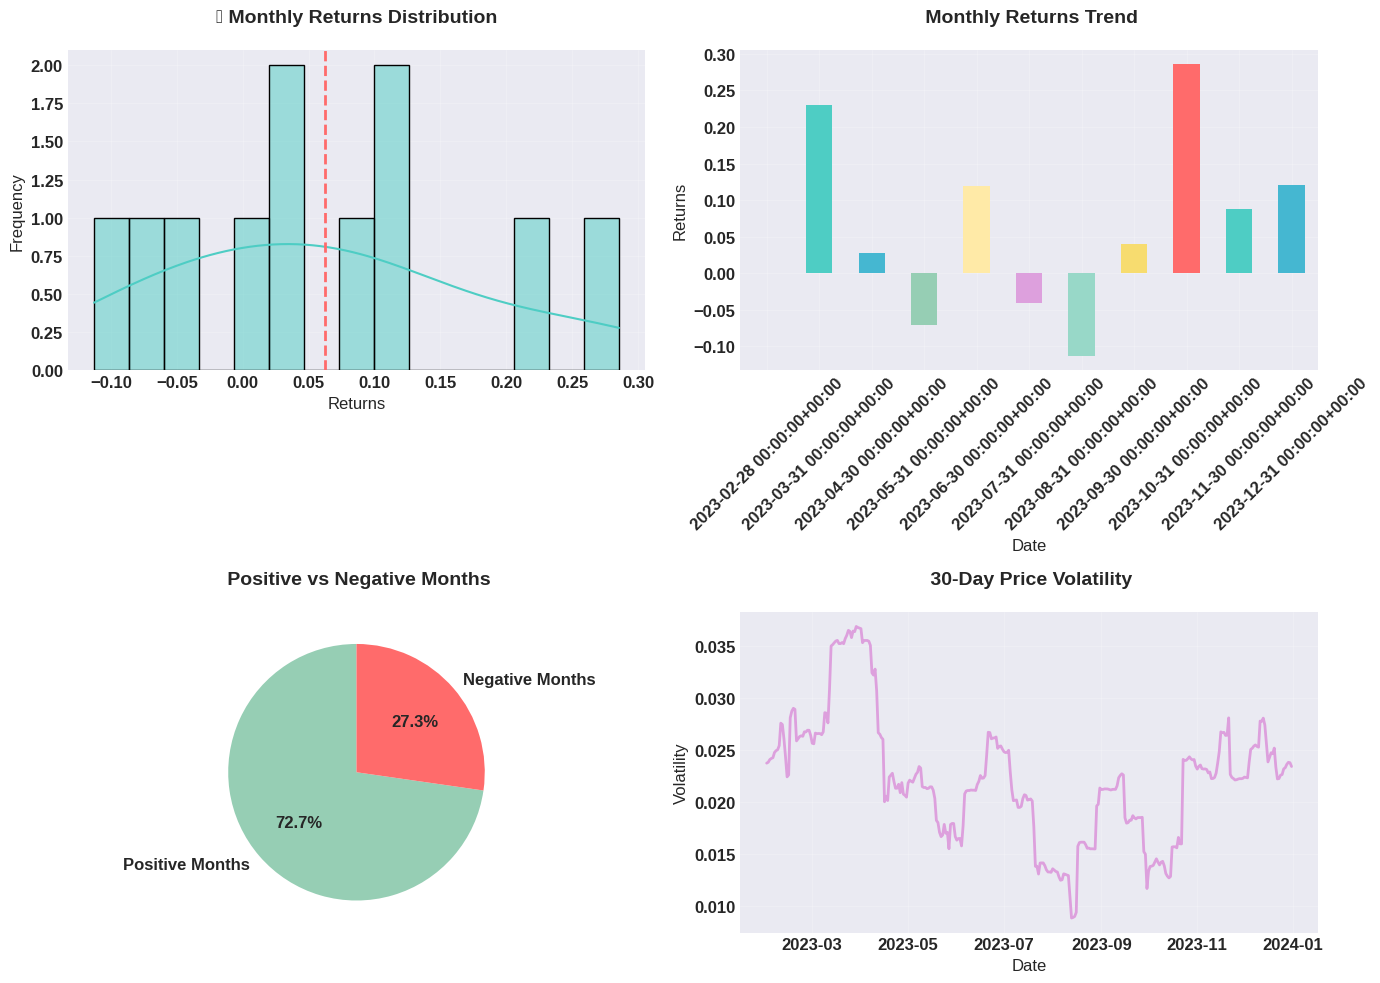

In [10]:
monthly_returns = df['Close'].resample('M').last().pct_change().dropna()

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(monthly_returns, kde=True, color='#4ECDC4', bins=15)
plt.axvline(monthly_returns.mean(), color='#FF6B6B', linestyle='--', linewidth=2)
plt.title('📈 Monthly Returns Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Returns')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
monthly_returns.plot(kind='bar', color=[colors[i % len(colors)] for i in range(len(monthly_returns))])
plt.title(' Monthly Returns Trend', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Returns')

plt.subplot(2, 2, 3)
positive_returns = (monthly_returns > 0).value_counts()
plt.pie(positive_returns.values, 
        labels=['Positive Months', 'Negative Months'], 
        colors=['#96CEB4', '#FF6B6B'],
        autopct='%1.1f%%',
        startangle=90)
plt.title(' Positive vs Negative Months', fontsize=14, fontweight='bold')

plt.subplot(2, 2, 4)
volatility = df['Close'].pct_change().rolling(30).std()
plt.plot(volatility.index, volatility.values, color='#DDA0DD', linewidth=2)
plt.title(' 30-Day Price Volatility', fontsize=14, fontweight='bold')
plt.ylabel('Volatility')
plt.xlabel('Date')

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(120deg, #e0f2fe, #bae6fd, #7dd3fc);
  border-radius: 16px;
  padding: 22px;
  text-align: center;
  font-family: 'Segoe UI', sans-serif;
  box-shadow: 0 4px 12px rgba(0,0,0,0.1);
">

<h1 style="
  color: #0c4a6e;
  font-size: 28px;
  font-weight: bold;
  letter-spacing: 0.6px;
  text-shadow: 1px 1px 4px rgba(255,255,255,0.3);
">
📉 Price–Volume Dynamics & Market Behavior
</h1>

<p style="
  color: #075985;
  font-size: 16px;
  margin-top: 10px;
">
A comprehensive visualization of price–volume correlations, weekly trading volume patterns, 
cumulative returns, and daily price range distributions to capture market momentum and volatility.
</p>

</div>

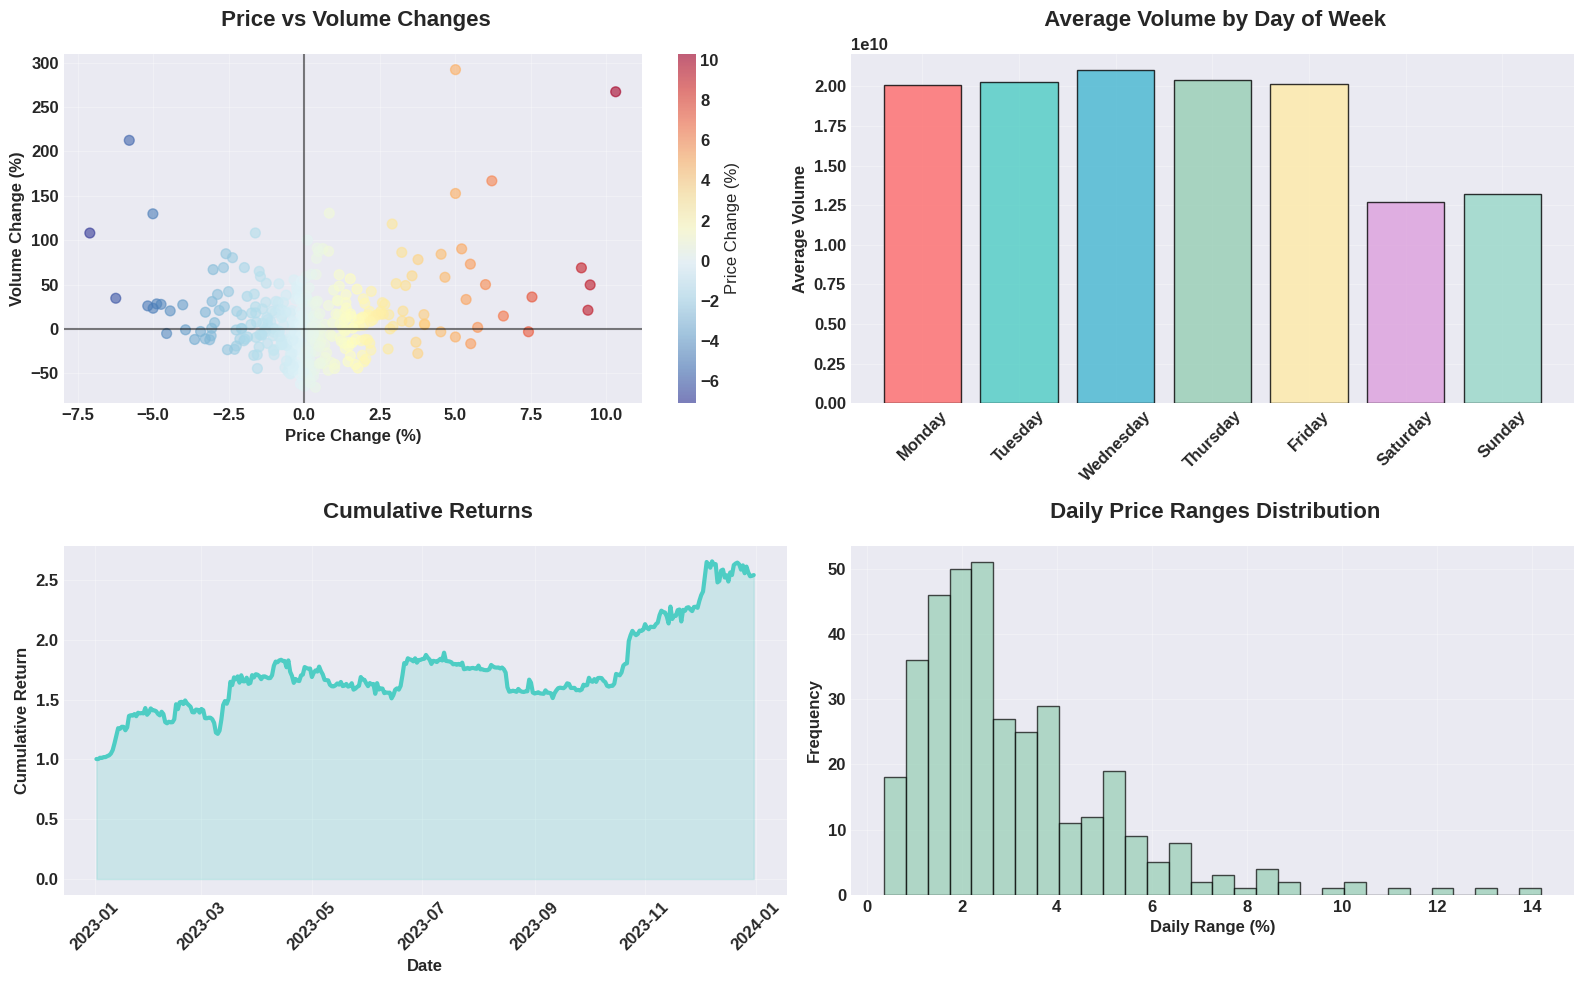

In [11]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
price_changes = df['Close'].pct_change() * 100
volume_changes = df['Volume'].pct_change() * 100

plt.scatter(price_changes, volume_changes, 
           c=price_changes, cmap='RdYlBu_r', alpha=0.6, s=50)
plt.colorbar(label='Price Change (%)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.title(' Price vs Volume Changes', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Price Change (%)', fontweight='bold')
plt.ylabel('Volume Change (%)', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
df['DayOfWeek'] = df.index.day_name()
volume_by_day = df.groupby('DayOfWeek')['Volume'].mean()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
volume_by_day = volume_by_day.reindex(days_order)

plt.bar(volume_by_day.index, volume_by_day.values, 
        color=colors, alpha=0.8, edgecolor='black')
plt.title(' Average Volume by Day of Week', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45)
plt.ylabel('Average Volume', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
cumulative_returns = (1 + df['Close'].pct_change()).cumprod()
plt.plot(df.index, cumulative_returns, color=colors[1], linewidth=3)
plt.fill_between(df.index, cumulative_returns, alpha=0.2, color=colors[1])
plt.title(' Cumulative Returns', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Cumulative Return', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
daily_ranges = ((df['High'] - df['Low']) / df['Low']) * 100
plt.hist(daily_ranges, bins=30, color=colors[3], alpha=0.7, edgecolor='black')
plt.title(' Daily Price Ranges Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Daily Range (%)', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
Create luxury dashboard 
</h1>

</div>

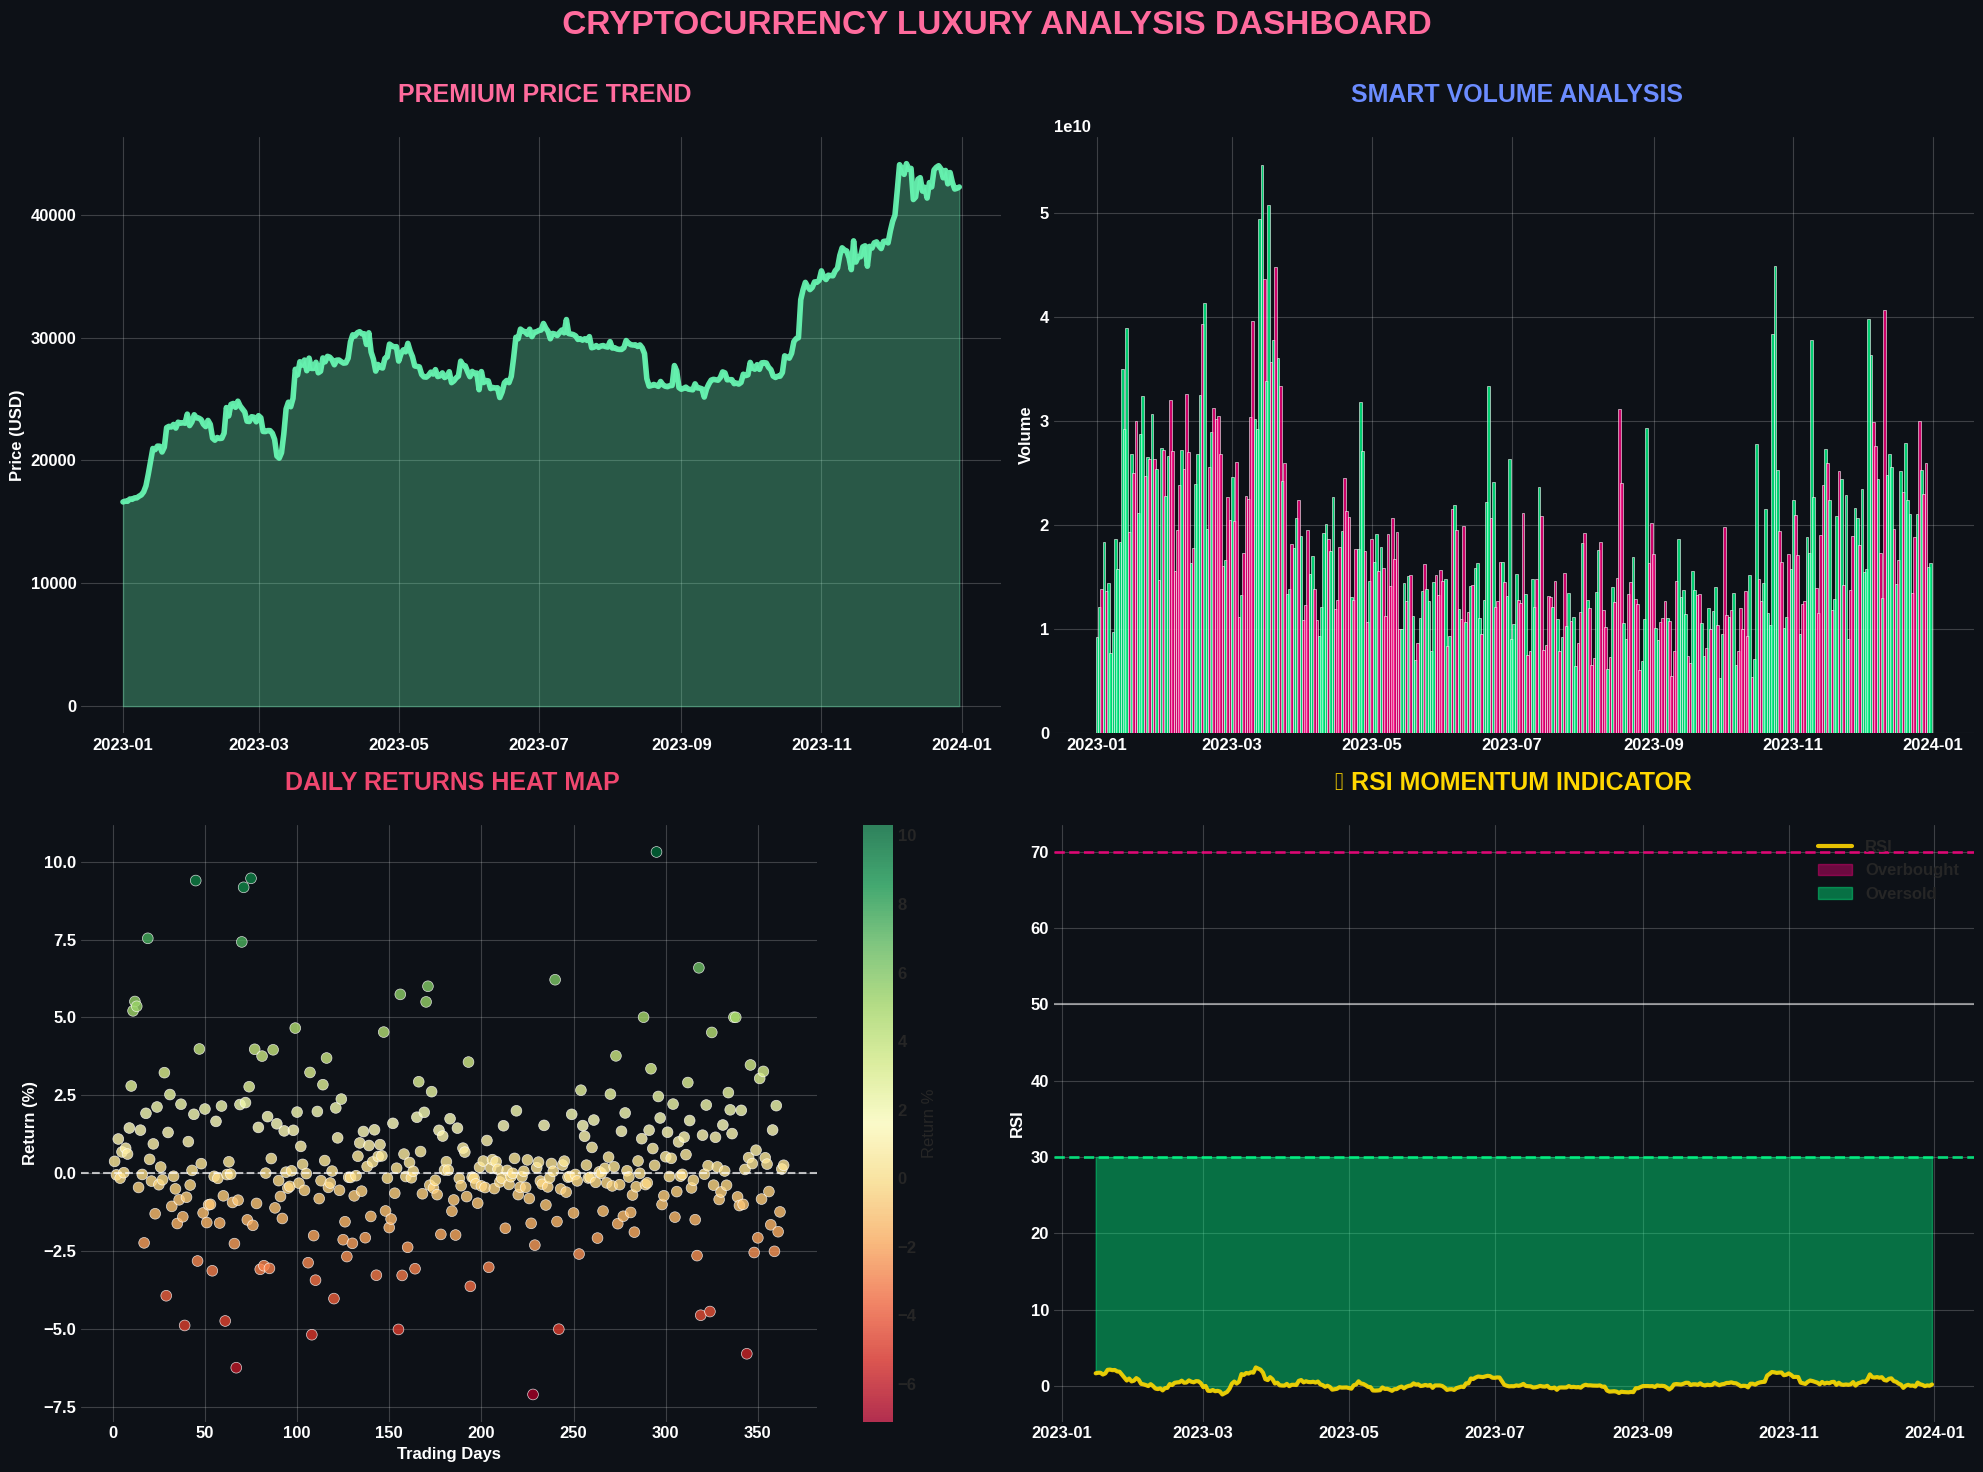

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.patch.set_facecolor('#0D1117')
fig.suptitle(' CRYPTOCURRENCY LUXURY ANALYSIS DASHBOARD\n', 
             fontsize=24, fontweight='black', color='#FF6B9D', y=0.98)

axes[0,0] = add_gradient_background(axes[0,0])
axes[0,0].plot(df.index, df['Close'], 
               color=luxury_palettes['crypto_modern'][1], 
               linewidth=4, alpha=0.9)
axes[0,0].fill_between(df.index, df['Close'], 
                      alpha=0.3, 
                      color=luxury_palettes['crypto_modern'][1])
axes[0,0].set_title(' PREMIUM PRICE TREND', 
                   fontsize=18, 
                   color=luxury_palettes['crypto_modern'][0],
                   pad=25)
axes[0,0].set_ylabel('Price (USD)', fontweight='bold', color='white')
axes[0,0].tick_params(colors='white')
axes[0,0].grid(True, alpha=0.2, color='white')

axes[0,1] = add_gradient_background(axes[0,1])
colors_volume = [luxury_palettes['neon_dark'][1] if df['Close'].iloc[i] > df['Open'].iloc[i] 
                else luxury_palettes['neon_dark'][0] for i in range(len(df))]
axes[0,1].bar(df.index, df['Volume'], 
             color=colors_volume, 
             alpha=0.8, 
             width=1.2,
             edgecolor='white',
             linewidth=0.5)
axes[0,1].set_title(' SMART VOLUME ANALYSIS', 
                   fontsize=18, 
                   color=luxury_palettes['crypto_modern'][2],
                   pad=25)
axes[0,1].set_ylabel('Volume', fontweight='bold', color='white')
axes[0,1].tick_params(colors='white')
axes[0,1].grid(True, alpha=0.2, color='white')

axes[1,0] = add_gradient_background(axes[1,0])
daily_returns = df['Close'].pct_change() * 100
x = range(len(daily_returns))
scatter = axes[1,0].scatter(x, daily_returns, 
                           c=daily_returns, 
                           cmap='RdYlGn', 
                           s=60, 
                           alpha=0.8,
                           edgecolors='white',
                           linewidth=0.5)
axes[1,0].axhline(y=0, color='white', linestyle='--', alpha=0.7)
axes[1,0].set_title(' DAILY RETURNS HEAT MAP', 
                   fontsize=18, 
                   color=luxury_palettes['crypto_modern'][4],
                   pad=25)
axes[1,0].set_ylabel('Return (%)', fontweight='bold', color='white')
axes[1,0].set_xlabel('Trading Days', fontweight='bold', color='white')
axes[1,0].tick_params(colors='white')
axes[1,0].grid(True, alpha=0.2, color='white')
plt.colorbar(scatter, ax=axes[1,0], label='Return %')

axes[1,1] = add_gradient_background(axes[1,1])
axes[1,1].plot(df.index, df['RSI'], 
               color=luxury_palettes['golden_hour'][0], 
               linewidth=3, 
               alpha=0.9)
axes[1,1].fill_between(df.index, df['RSI'], 70, 
                      where=(df['RSI'] >= 70), 
                      alpha=0.4, 
                      color=luxury_palettes['neon_dark'][0])
axes[1,1].fill_between(df.index, df['RSI'], 30, 
                      where=(df['RSI'] <= 30), 
                      alpha=0.4, 
                      color=luxury_palettes['neon_dark'][1])
axes[1,1].axhline(y=70, color=luxury_palettes['neon_dark'][0], linestyle='--', alpha=0.8, linewidth=2)
axes[1,1].axhline(y=30, color=luxury_palettes['neon_dark'][1], linestyle='--', alpha=0.8, linewidth=2)
axes[1,1].axhline(y=50, color='white', linestyle='-', alpha=0.5)
axes[1,1].set_title('📈 RSI MOMENTUM INDICATOR', 
                   fontsize=18, 
                   color=luxury_palettes['golden_hour'][0],
                   pad=25)
axes[1,1].set_ylabel('RSI', fontweight='bold', color='white')
axes[1,1].legend(['RSI', 'Overbought', 'Oversold'], fontsize=12, loc='upper right')
axes[1,1].tick_params(colors='white')
axes[1,1].grid(True, alpha=0.2, color='white')

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
     Create advanced technical analysis 

</h1>

</div>

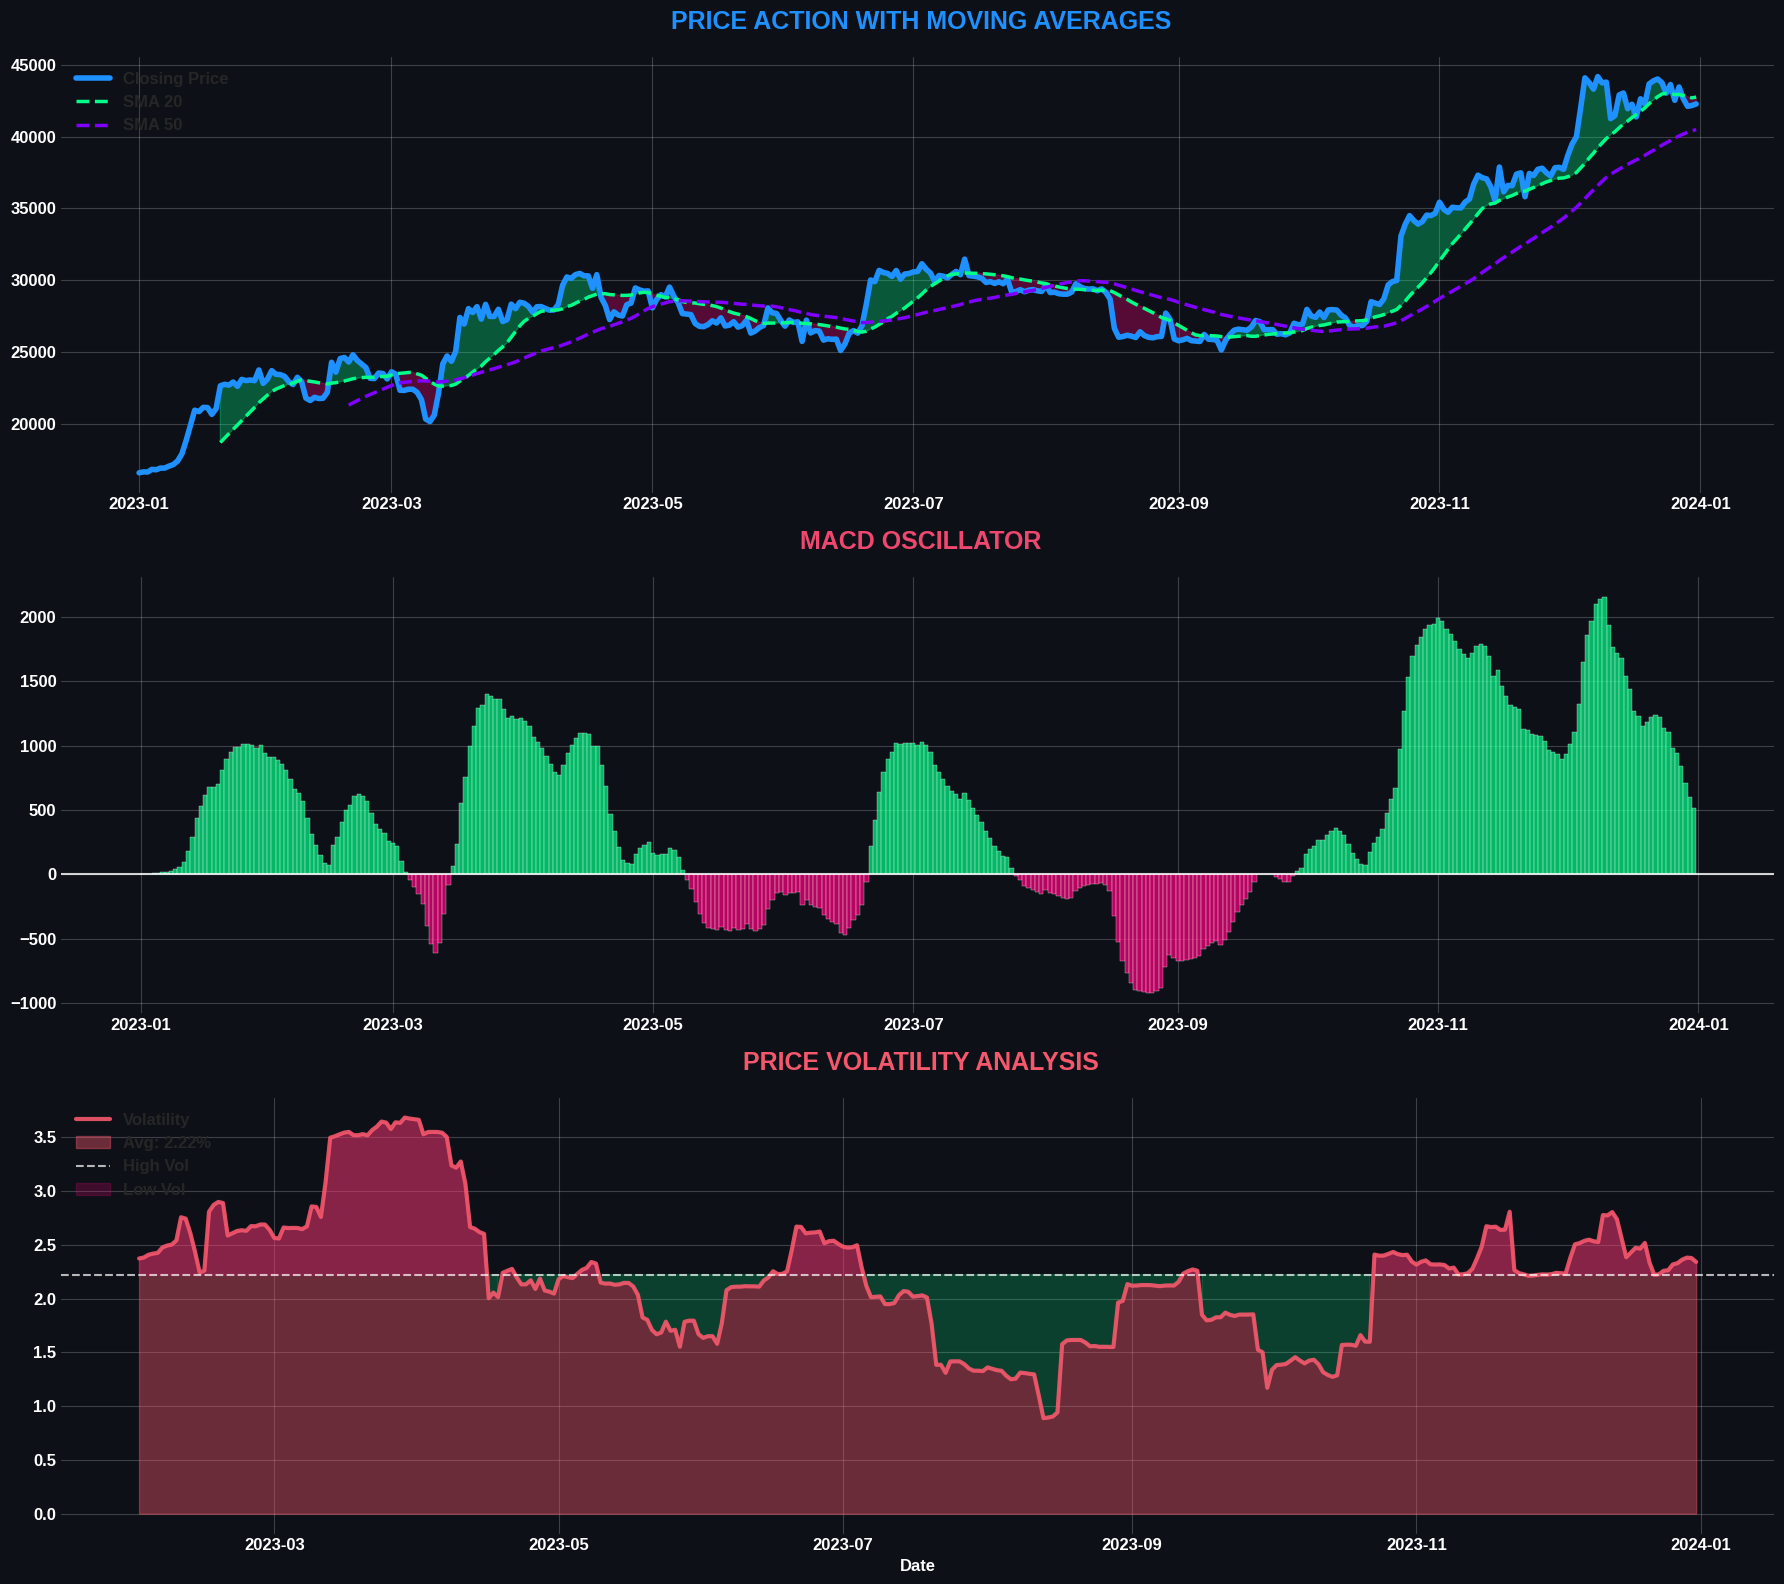

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(18, 16))
fig.patch.set_facecolor('#0D1117')

axes[0] = add_gradient_background(axes[0])
axes[0].plot(df.index, df['Close'], 
            label='Closing Price', 
            color=luxury_palettes['ocean_blue'][0], 
            linewidth=4)
axes[0].plot(df.index, df['SMA_20'], 
            label='SMA 20', 
            color=luxury_palettes['neon_dark'][1], 
            linewidth=2.5,
            linestyle='--')
axes[0].plot(df.index, df['SMA_50'], 
            label='SMA 50', 
            color=luxury_palettes['neon_dark'][5], 
            linewidth=2.5,
            linestyle='--')

axes[0].fill_between(df.index, df['Close'], df['SMA_20'], 
                    where=(df['Close'] > df['SMA_20']),
                    alpha=0.3, 
                    color=luxury_palettes['neon_dark'][1])
axes[0].fill_between(df.index, df['Close'], df['SMA_20'], 
                    where=(df['Close'] <= df['SMA_20']),
                    alpha=0.3, 
                    color=luxury_palettes['neon_dark'][0])

axes[0].set_title(' PRICE ACTION WITH MOVING AVERAGES', 
                 fontsize=18, 
                 color=luxury_palettes['ocean_blue'][0],
                 pad=20)
axes[0].legend(fontsize=12, loc='upper left')
axes[0].tick_params(colors='white')
axes[0].grid(True, alpha=0.2, color='white')

# Plot 2: MACD with Dual Colors
axes[1] = add_gradient_background(axes[1])
macd_colors = [luxury_palettes['neon_dark'][1] if x >= 0 
              else luxury_palettes['neon_dark'][0] 
              for x in df['MACD']]

bars = axes[1].bar(df.index, df['MACD'], 
                  color=macd_colors, 
                  alpha=0.7,
                  width=1.0,
                  edgecolor='white',
                  linewidth=0.3)
axes[1].axhline(y=0, color='white', linestyle='-', alpha=0.8)
axes[1].set_title(' MACD OSCILLATOR', 
                 fontsize=18, 
                 color=luxury_palettes['crypto_modern'][4],
                 pad=20)
axes[1].tick_params(colors='white')
axes[1].grid(True, alpha=0.2, color='white')

axes[2] = add_gradient_background(axes[2])
volatility_color = luxury_palettes['gradient_purple'][3]
axes[2].plot(df.index, df['Volatility'], 
            color=volatility_color, 
            linewidth=3,
            alpha=0.9)
axes[2].fill_between(df.index, df['Volatility'], 
                    alpha=0.4, 
                    color=volatility_color)

axes[2].axhline(y=df['Volatility'].mean(), 
               color='white', 
               linestyle='--', 
               alpha=0.7)
axes[2].fill_between(df.index, df['Volatility'], df['Volatility'].mean(),
                    where=(df['Volatility'] > df['Volatility'].mean()),
                    alpha=0.2, 
                    color=luxury_palettes['neon_dark'][0])
axes[2].fill_between(df.index, df['Volatility'], df['Volatility'].mean(),
                    where=(df['Volatility'] <= df['Volatility'].mean()),
                    alpha=0.2, 
                    color=luxury_palettes['neon_dark'][1])

axes[2].set_title(' PRICE VOLATILITY ANALYSIS', 
                 fontsize=18, 
                 color=volatility_color,
                 pad=20)
axes[2].set_xlabel('Date', fontweight='bold', color='white')
axes[2].legend(['Volatility', f'Avg: {df["Volatility"].mean():.2f}%', 'High Vol', 'Low Vol'], 
              fontsize=12, loc='upper left')
axes[2].tick_params(colors='white')
axes[2].grid(True, alpha=0.2, color='white')

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
🌿  Calculate correlations with more features

</h1>

</div>

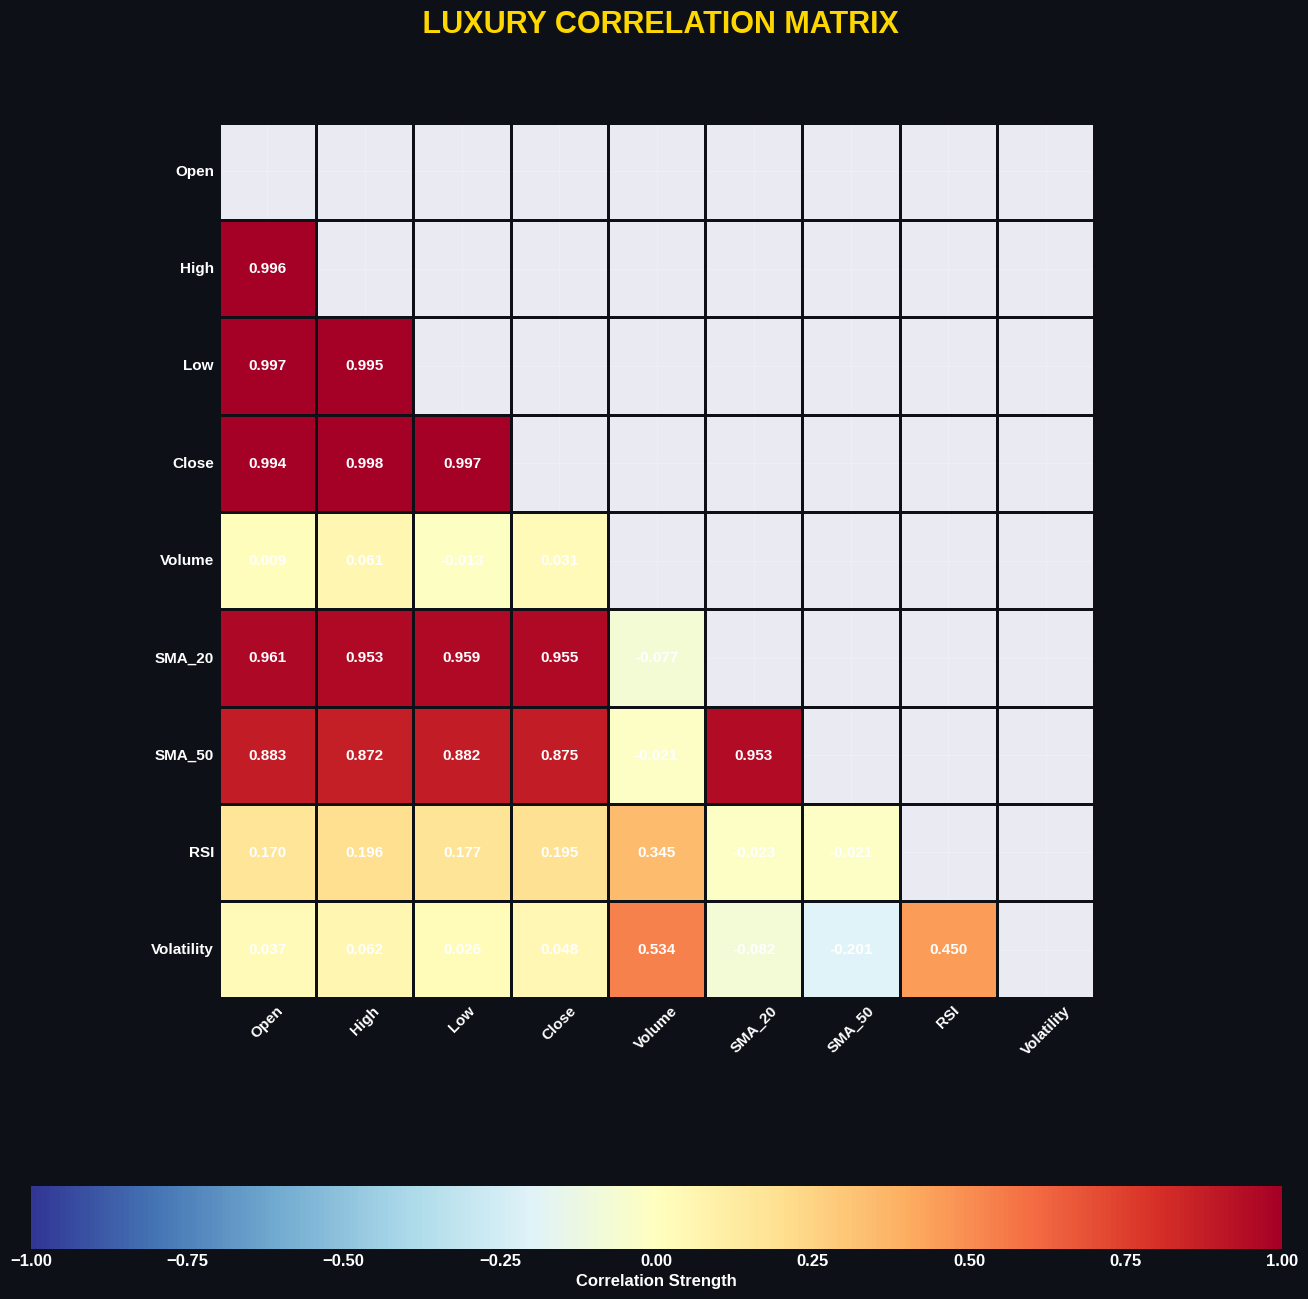

In [14]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_20', 'SMA_50', 'RSI', 'Volatility']
corr_matrix = df[features].corr()

plt.figure(figsize=(16, 14))
fig = plt.gcf()
fig.patch.set_facecolor('#0D1117')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

heatmap = sns.heatmap(corr_matrix, 
                     mask=mask,
                     annot=True, 
                     cmap='RdYlBu_r',
                     center=0,
                     square=True,
                     fmt='.3f',
                     cbar_kws={"shrink": .8, "orientation": "horizontal"},
                     linewidths=2,
                     linecolor='#0D1117',
                     annot_kws={'size': 11, 'weight': 'bold', 'color': 'white'},
                     vmin=-1, vmax=1,
                     cbar=True)

cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(colors='white')
cbar.set_label('Correlation Strength', color='white', fontweight='bold', fontsize=12)

plt.title(' LUXURY CORRELATION MATRIX\n', 
          fontsize=22, 
          fontweight='black', 
          color='#FFD700',
          pad=40)
plt.xticks(rotation=45, fontweight='bold', fontsize=11, color='white')
plt.yticks(rotation=0, fontweight='bold', fontsize=11, color='white')

for spine in plt.gca().spines.values():
    spine.set_color('#FFD700')
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
    Calculate advanced performance metrics

</h1>

</div>

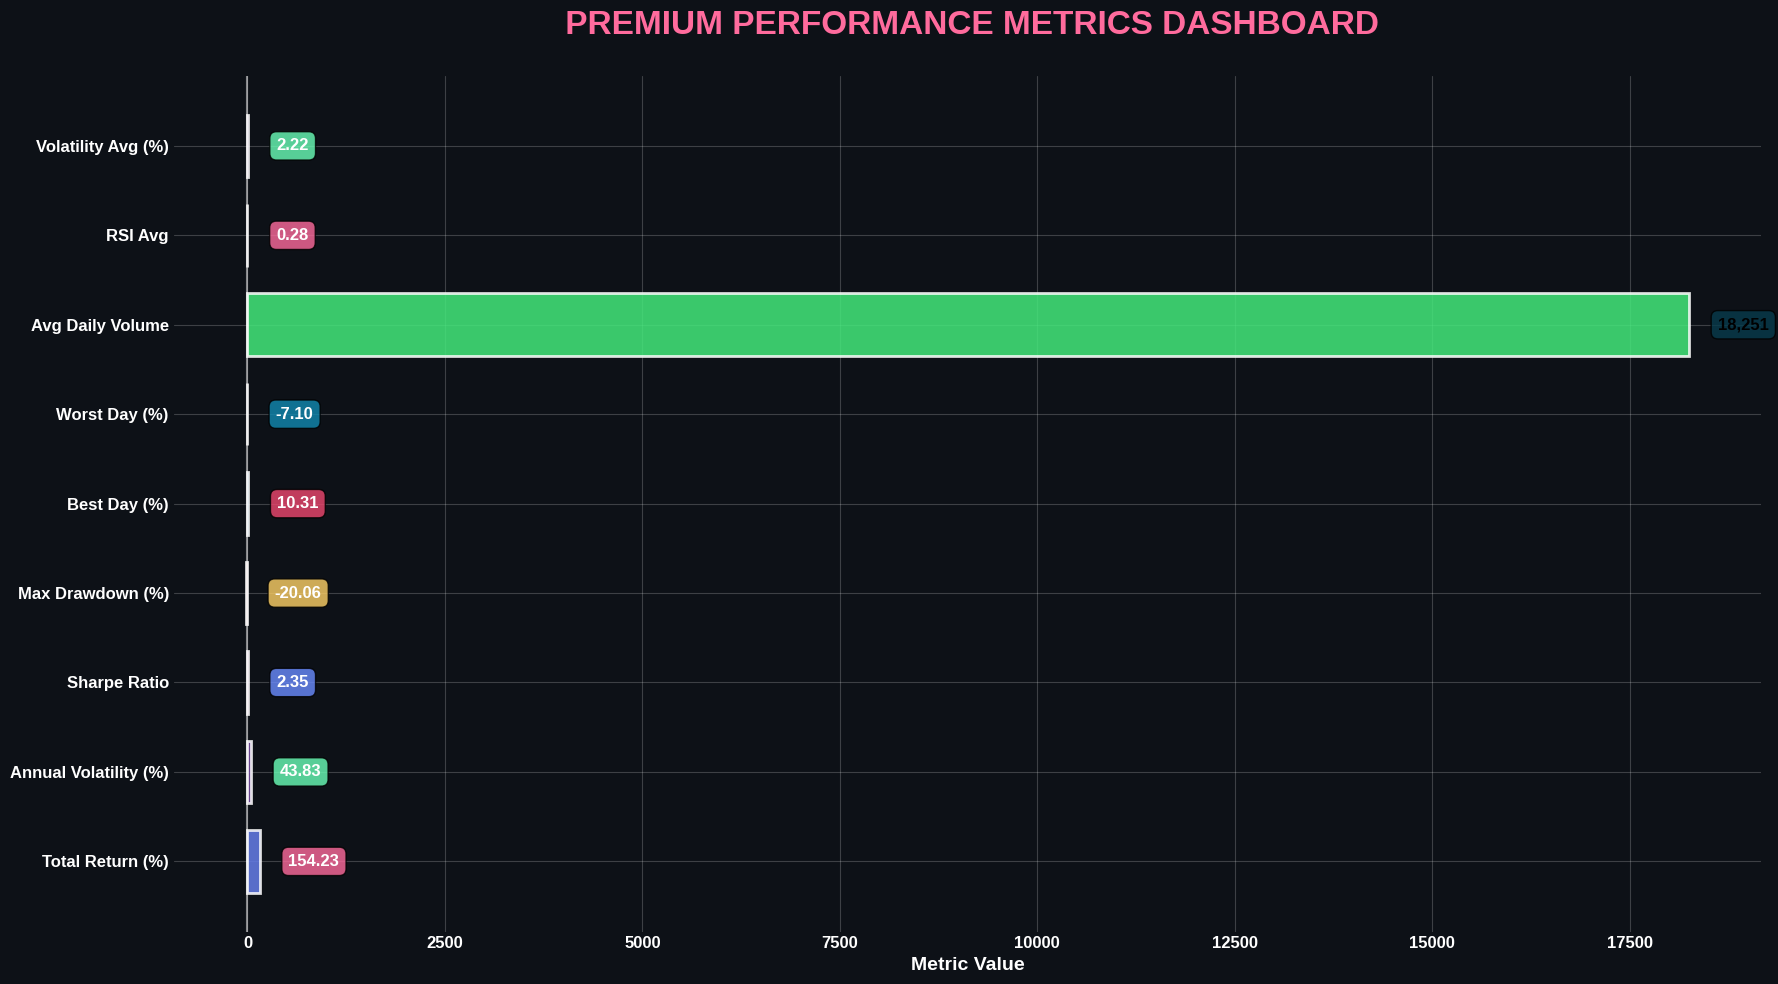

In [15]:
performance_data = {
    'Total Return (%)': (df['Close'].iloc[-1] / df['Close'].iloc[0] - 1) * 100,
    'Annual Volatility (%)': df['Close'].pct_change().std() * np.sqrt(365) * 100,
    'Sharpe Ratio': df['Close'].pct_change().mean() / df['Close'].pct_change().std() * np.sqrt(365),
    'Max Drawdown (%)': (df['Close'] / df['Close'].expanding().max() - 1).min() * 100,
    'Best Day (%)': df['Close'].pct_change().max() * 100,
    'Worst Day (%)': df['Close'].pct_change().min() * 100,
    'Avg Daily Volume': df['Volume'].mean() / 1e6,
    'RSI Avg': df['RSI'].mean(),
    'Volatility Avg (%)': df['Volatility'].mean()
}

fig, ax = plt.subplots(figsize=(18, 10))
fig.patch.set_facecolor('#0D1117')
ax = add_gradient_background(ax)

metrics_names = list(performance_data.keys())
metrics_values = list(performance_data.values())

gradient_bars = ax.barh(metrics_names, metrics_values, 
                       color=luxury_palettes['gradient_purple'][:len(metrics_names)],
                       alpha=0.85,
                       height=0.7,
                       edgecolor='white',
                       linewidth=2)

for i, (bar, value) in enumerate(zip(gradient_bars, metrics_values)):
    width = bar.get_width()
    color = 'white' if abs(value) < max(metrics_values) * 0.6 else 'black'
    ax.text(width + (0.02 * max(metrics_values)), 
            bar.get_y() + bar.get_height()/2, 
            f'{value:.2f}' if abs(value) < 1000 else f'{value:,.0f}', 
            ha='left', va='center', 
            fontweight='bold', fontsize=12,
            color=color,
            bbox=dict(boxstyle="round,pad=0.4", 
                     facecolor=luxury_palettes['crypto_modern'][i % len(luxury_palettes['crypto_modern'])], 
                     alpha=0.8))

ax.set_title(' PREMIUM PERFORMANCE METRICS DASHBOARD', 
            fontsize=24, 
            fontweight='black', 
            color='#FF6B9D',
            pad=30)
ax.set_xlabel('Metric Value', fontweight='bold', fontsize=14, color='white')
ax.tick_params(colors='white', labelsize=12)
ax.grid(True, alpha=0.2, color='white', axis='x')

ax.axvline(x=0, color='white', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
 Create price range visualization 
</h1>

</div>

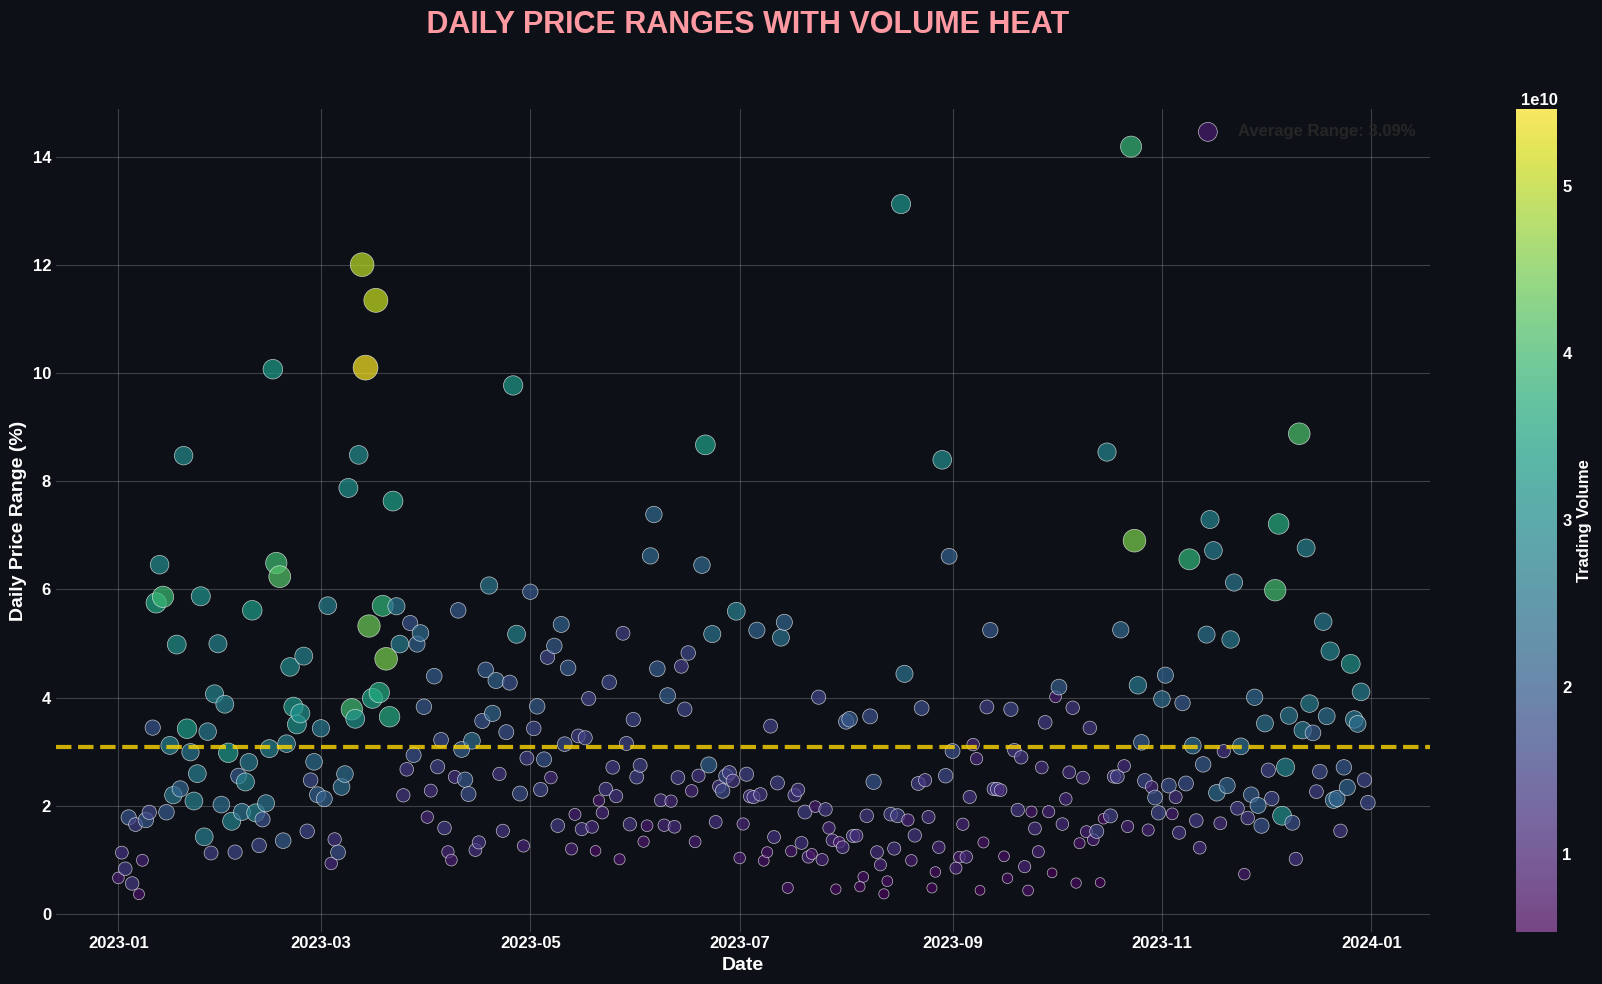

In [16]:
plt.figure(figsize=(18, 10))
fig = plt.gcf()
fig.patch.set_facecolor('#0D1117')
ax = plt.gca()
ax = add_gradient_background(ax)

daily_ranges = ((df['High'] - df['Low']) / df['Low']) * 100

scatter = ax.scatter(df.index, daily_ranges,
                    c=df['Volume'],
                    cmap='viridis',
                    s=df['Volume']/df['Volume'].max() * 300 + 20,
                    alpha=0.7,
                    edgecolors='white',
                    linewidth=0.5)

avg_range = daily_ranges.mean()
ax.axhline(y=avg_range, color=luxury_palettes['golden_hour'][0], 
          linestyle='--', linewidth=3, alpha=0.8)

ax.set_title(' DAILY PRICE RANGES WITH VOLUME HEAT\n', 
            fontsize=22, 
            fontweight='black', 
            color=luxury_palettes['pastel_dream'][0],
            pad=30)
ax.set_ylabel('Daily Price Range (%)', fontweight='bold', fontsize=14, color='white')
ax.set_xlabel('Date', fontweight='bold', fontsize=14, color='white')
ax.tick_params(colors='white')
ax.grid(True, alpha=0.2, color='white')
ax.legend([f'Average Range: {avg_range:.2f}%'], fontsize=12, loc='upper right')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Trading Volume', color='white', fontweight='bold', fontsize=12)
cbar.ax.tick_params(colors='white')

plt.tight_layout()
plt.show()

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
Data Preprocessing & Feature Engineering
</h1>

</div>

In [17]:
df['Price_Change'] = df['Close'] - df['Open']
df['Daily_Return'] = df['Close'].pct_change()
df['High_Low_Pct'] = (df['High'] - df['Low']) / df['Low']
df['Volume_Change'] = df['Volume'].pct_change()

df['MA_7'] = df['Close'].rolling(window=7).mean()
df['MA_21'] = df['Close'].rolling(window=21).mean()

df['Target'] = df['Close'].shift(-1)

df = df.dropna()

print("Processed Data Shape:", df.shape)
df.head()

Processed Data Shape: (315, 23)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA_20,SMA_50,EMA_12,...,BB_upper,BB_lower,DayOfWeek,Price_Change,Daily_Return,High_Low_Pct,Volume_Change,MA_7,MA_21,Target
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-19 00:00:00+00:00,24640.027344,25093.054688,24327.642578,24327.642578,25555105670,0.0,0.0,23082.980176,21325.851250,23452.409347,...,25033.152135,21132.808217,Sunday,-312.384766,-0.012728,0.031463,0.302143,23642.106306,23071.416295,24829.148438
2023-02-20 00:00:00+00:00,24336.623047,25020.458984,23927.910156,24829.148438,28987376573,0.0,0.0,23167.473438,21489.932617,23664.257622,...,25268.511378,21066.435497,Monday,492.525391,0.020615,0.045660,0.134309,24073.684431,23166.131045,24436.353516
2023-02-21 00:00:00+00:00,24833.048828,25126.851562,24200.363281,24436.353516,31252098714,0.0,0.0,23203.102637,21644.890273,23783.061659,...,25367.086027,21039.119247,Tuesday,-396.695312,-0.015820,0.038284,0.078128,24390.191406,23227.896298,24188.843750
2023-02-22 00:00:00+00:00,24437.417969,24472.339844,23644.318359,24188.843750,30199996781,0.0,0.0,23238.951270,21795.070000,23845.498591,...,25445.027143,21032.875396,Wednesday,-248.574219,-0.010129,0.035020,-0.033665,24373.191685,23250.042690,23947.492188
2023-02-23 00:00:00+00:00,24190.718750,24572.089844,23693.919922,23947.492188,30476264066,0.0,0.0,23263.859766,21936.755078,23861.191810,...,25491.084932,21036.634600,Thursday,-243.226562,-0.009978,0.037063,0.009148,24419.479911,23272.691313,23198.126953


<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
Prepare Data for Machine Learning
</h1>

</div>

In [18]:
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 
                   'Price_Change', 'Daily_Return', 'High_Low_Pct', 
                   'Volume_Change', 'MA_7', 'MA_21']

X = df[feature_columns]
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape}")
print(f"Testing set size: {X_test_scaled.shape}")

Training set size: (252, 11)
Testing set size: (63, 11)


<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
Random Forest Model
</h1>

</div>

In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_predictions = rf_model.predict(X_test_scaled)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print(f"Random Forest - MAE: {rf_mae:.2f}")
print(f"Random Forest - RMSE: {rf_rmse:.2f}")

Random Forest - MAE: 5333.64
Random Forest - RMSE: 6261.63


<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
LSTM Model for Time Series
</h1>

</div>

In [20]:
def create_lstm_data(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

close_prices = df['Close'].values.reshape(-1, 1)

close_scaler = MinMaxScaler()
close_scaled = close_scaler.fit_transform(close_prices)

time_steps = 60
X_lstm, y_lstm = create_lstm_data(close_scaled, time_steps)

split_idx = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split_idx], X_lstm[split_idx:]
y_train_lstm, y_test_lstm = y_lstm[:split_idx], y_lstm[split_idx:]

X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], 1)
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], 1)

print(f"LSTM Training shape: {X_train_lstm.shape}")
print(f"LSTM Testing shape: {X_test_lstm.shape}")

LSTM Training shape: (204, 60, 1)
LSTM Testing shape: (51, 60, 1)


<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
Build and Train LSTM Model
</h1>

</div>

In [21]:
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    batch_size=32,
    epochs=50,
    validation_data=(X_test_lstm, y_test_lstm),
    verbose=1
)

I0000 00:00:1762250248.302521      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Epoch 1/50


I0000 00:00:1762250253.233564      67 cuda_dnn.cc:529] Loaded cuDNN version 90300


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - loss: 0.0808 - val_loss: 0.0049
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0179 - val_loss: 0.0941
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0115 - val_loss: 0.0919
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0082 - val_loss: 0.0267
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0069 - val_loss: 0.0466
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0068 - val_loss: 0.0663
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0073 - val_loss: 0.0356
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - val_loss: 0.0337
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - val_loss: 0.0398
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0046 - val_loss: 0.0268
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0039 - val_loss: 0.0192
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0050 - val_loss: 0.0216
Epoch 13/50

<div style="
  background: linear-gradient(135deg, #f0f9ff, #e0f7fa);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0284c7;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
Evaluate Models and Visualize Results
</h1>

</div>

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
=== MODEL COMPARISON ===
Random Forest - MAE: 5333.64, RMSE: 6261.63
LSTM - MAE: 2415.34, RMSE: 2746.72


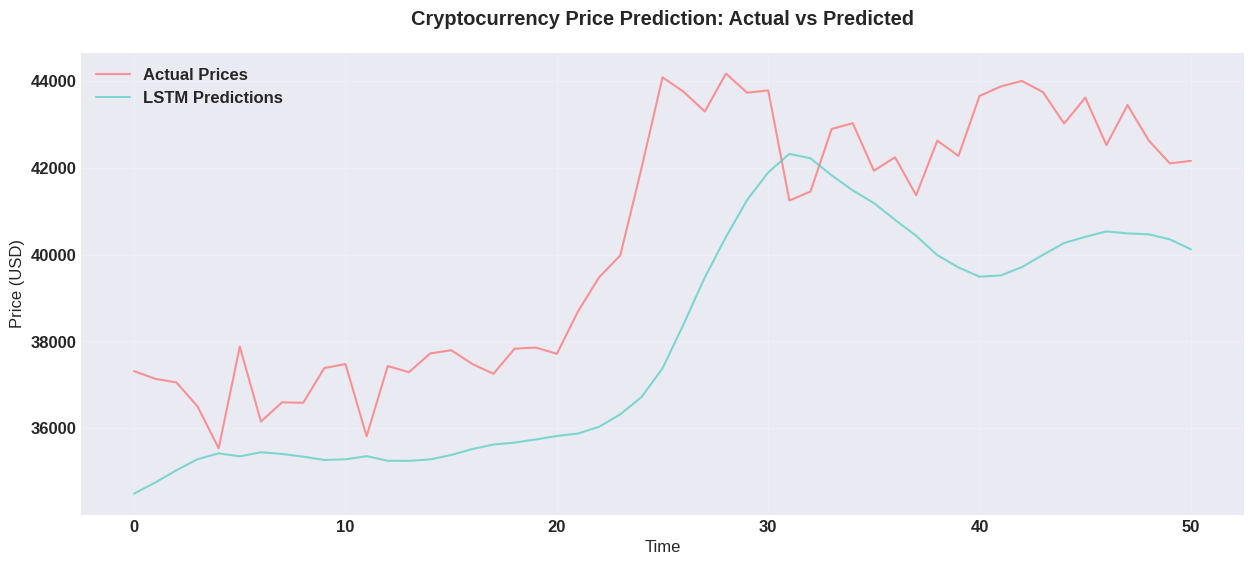

In [22]:
lstm_predictions = lstm_model.predict(X_test_lstm)

lstm_predictions = close_scaler.inverse_transform(lstm_predictions)
y_test_actual = close_scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

lstm_mae = mean_absolute_error(y_test_actual, lstm_predictions)
lstm_rmse = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))

print("=== MODEL COMPARISON ===")
print(f"Random Forest - MAE: {rf_mae:.2f}, RMSE: {rf_rmse:.2f}")
print(f"LSTM - MAE: {lstm_mae:.2f}, RMSE: {lstm_rmse:.2f}")

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label='Actual Prices', alpha=0.7)
plt.plot(lstm_predictions, label='LSTM Predictions', alpha=0.7)
plt.title('Cryptocurrency Price Prediction: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

<div style="
  background: linear-gradient(135deg, #e0f7fa, #f0fdf4);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #0d9488;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
📈 LSTM Cryptocurrency 30-Day Price Forecast
</h1>

<p style="
  color: #0369a1;
  font-size: 16px;
  margin-top: 8px;
">
Forecasting Bitcoin price trends for the next 30 days using a trained LSTM model,
visualized through dynamic plots and a color-coded prediction table.
</p>

</div>

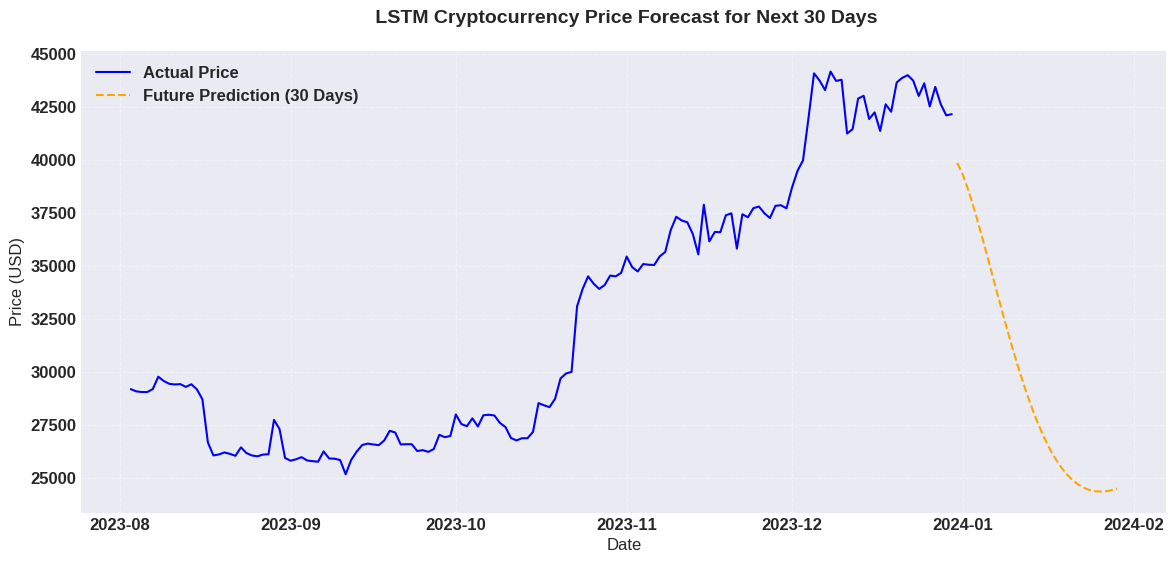

,Date,Predicted Price (USD),Change,% Change
0,2023-12-31 00:00:00+00:00,39855.28,nan,nan%
1,2024-01-01 00:00:00+00:00,39299.19,-556.09,-1.40%
2,2024-01-02 00:00:00+00:00,38570.95,-728.25,-1.85%
3,2024-01-03 00:00:00+00:00,37733.78,-837.17,-2.17%
4,2024-01-04 00:00:00+00:00,36828.01,-905.77,-2.40%
5,2024-01-05 00:00:00+00:00,35881.16,-946.85,-2.57%
6,2024-01-06 00:00:00+00:00,34913.59,-967.57,-2.70%
7,2024-01-07 00:00:00+00:00,33941.57,-972.02,-2.78%
8,2024-01-08 00:00:00+00:00,32978.91,-962.66,-2.84%
9,2024-01-09 00:00:00+00:00,32037.72,-941.20,-2.85%


In [23]:

from IPython.display import display, HTML


df.columns = df.columns.get_level_values(0)


lookback = 60  
last_sequence = df['Close'].values[-lookback:].reshape(-1, 1)
scaled_last_sequence = close_scaler.transform(last_sequence)

future_predictions = []
current_sequence = scaled_last_sequence.reshape(1, lookback, 1)


for _ in range(30):
    next_pred = lstm_model.predict(current_sequence, verbose=0)
    future_predictions.append(next_pred[0, 0])
    current_sequence = np.append(
        current_sequence[:, 1:, :], [[[next_pred[0][0]]]], axis=1
    )

future_predictions_rescaled = close_scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)
)


future_days = pd.date_range(
    start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='D'
)


plt.figure(figsize=(14, 6))
plt.plot(df.index[-150:], df['Close'].values[-150:], label='Actual Price', color='blue')
plt.plot(
    future_days,
    future_predictions_rescaled,
    label='Future Prediction (30 Days)',
    color='orange',
    linestyle='dashed'
)
plt.title(" LSTM Cryptocurrency Price Forecast for Next 30 Days", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


df_future = pd.DataFrame({
    'Date': future_days,
    'Predicted Price (USD)': future_predictions_rescaled.flatten()
})

df_future['Change'] = df_future['Predicted Price (USD)'].diff()
df_future['% Change'] = df_future['Predicted Price (USD)'].pct_change() * 100

def color_row(row):
    if row['Change'] > 0:
        color = 'background-color: #b6f2b6;'  
    elif row['Change'] < 0:
        color = 'background-color: #f7b6b6;'  
    else:
        color = 'background-color: #f0f0f0;'  
    return [color] * len(row)

styled_table = (
    df_future.style
    .apply(color_row, axis=1)
    .format({
        'Predicted Price (USD)': '{:.2f}',
        'Change': '{:.2f}',
        '% Change': '{:.2f}%'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2563eb'), ('color', 'white'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('border', '1px solid #ccc'), ('padding', '6px')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}
    ])
    .set_caption(" 30-Day LSTM Price Forecast Table")
)

display(HTML(styled_table.to_html()))

<div style="
  background: linear-gradient(135deg, #e3f2fd, #f3e8ff);
  border-radius: 16px;
  padding: 18px;
  text-align: center;
  box-shadow: 0 2px 8px rgba(0,0,0,0.1);
  font-family: 'Segoe UI', sans-serif;
">

<h1 style="
  color: #1e40af;
  font-size: 28px;
  letter-spacing: 1px;
  text-shadow: 1px 1px 2px rgba(0,0,0,0.1);
">
 LSTM Cryptocurrency Long-Term Forecast — Until End of 2025
</h1>

<p style="
  color: #4c1d95;
  font-size: 16px;
  margin-top: 8px;
">
This section forecasts Bitcoin price movements until the end of 2025 using a trained LSTM model.  
The visualization includes both a future price trend chart and a color-coded prediction table highlighting upward and downward movements.
</p>

</div>

Forecasting for 731 days (until the end of 2025)


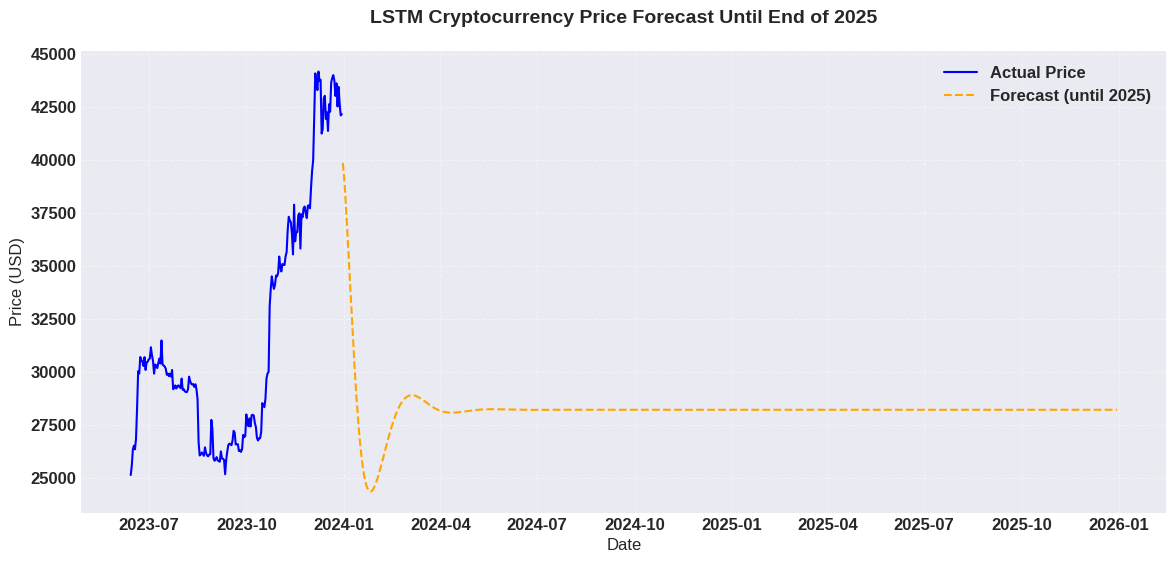

,Date,Predicted Price (USD),Change,% Change,Trend
0,2023-12-31 00:00:00,39855.28,nan,nan%,→
1,2024-01-01 00:00:00,39299.19,-556.09,-1.40%,↓
2,2024-01-02 00:00:00,38570.95,-728.25,-1.85%,↓
3,2024-01-03 00:00:00,37733.78,-837.17,-2.17%,↓
4,2024-01-04 00:00:00,36828.01,-905.77,-2.40%,↓
5,2024-01-05 00:00:00,35881.16,-946.85,-2.57%,↓
6,2024-01-06 00:00:00,34913.59,-967.57,-2.70%,↓
7,2024-01-07 00:00:00,33941.57,-972.02,-2.78%,↓
8,2024-01-08 00:00:00,32978.91,-962.66,-2.84%,↓
9,2024-01-09 00:00:00,32037.72,-941.20,-2.85%,↓


In [24]:
from IPython.display import display, HTML


df.index = pd.to_datetime(df.index).tz_localize(None)

df.columns = df.columns.get_level_values(0)

lookback = 60
last_sequence = df['Close'].values[-lookback:].reshape(-1, 1)
scaled_last_sequence = close_scaler.transform(last_sequence)

future_predictions = []
current_sequence = scaled_last_sequence.reshape(1, lookback, 1)

start_date = df.index[-1] + pd.Timedelta(days=1)
end_date = pd.Timestamp('2025-12-31')
days_ahead = (end_date - start_date).days

print(f"Forecasting for {days_ahead} days (until the end of 2025)")

for _ in range(days_ahead):
    next_pred = lstm_model.predict(current_sequence, verbose=0)
    future_predictions.append(next_pred[0, 0])
    current_sequence = np.append(
        current_sequence[:, 1:, :], [[[next_pred[0][0]]]], axis=1
    )

future_predictions_rescaled = close_scaler.inverse_transform(
    np.array(future_predictions).reshape(-1, 1)
)

future_days = pd.date_range(start=start_date, periods=days_ahead, freq='D')

plt.figure(figsize=(14, 6))
plt.plot(df.index[-200:], df['Close'].values[-200:], label='Actual Price', color='blue')
plt.plot(future_days, future_predictions_rescaled, label='Forecast (until 2025)', color='orange', linestyle='dashed')
plt.title("LSTM Cryptocurrency Price Forecast Until End of 2025", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

df_future = pd.DataFrame({
    'Date': future_days,
    'Predicted Price (USD)': future_predictions_rescaled.flatten()
})

df_future['Change'] = df_future['Predicted Price (USD)'].diff()
df_future['% Change'] = df_future['Predicted Price (USD)'].pct_change() * 100

def get_trend(change):
    if pd.isna(change):
        return '→'
    elif change > 0:
        return '↑'
    elif change < 0:
        return '↓'
    else:
        return '→'

df_future['Trend'] = df_future['Change'].apply(get_trend)

def color_row(row):
    if row['Change'] > 0:
        color = 'background-color: #b6f2b6;'
    elif row['Change'] < 0:
        color = 'background-color: #f7b6b6;'
    else:
        color = 'background-color: #f0f0f0;'
    return [color] * len(row)

styled_table = (
    df_future.style
    .apply(color_row, axis=1)
    .format({
        'Predicted Price (USD)': '{:.2f}',
        'Change': '{:.2f}',
        '% Change': '{:.2f}%'
    })
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2563eb'), ('color', 'white'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('border', '1px solid #ccc'), ('padding', '6px')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '16px'), ('font-weight', 'bold')]}
    ])
    .set_caption("LSTM Cryptocurrency Price Forecast — Until End of 2025")
)

display(HTML(styled_table.to_html()))